PREPARAÇÃO DE DADOS E AVALIAÇÃO DE MODELOS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({"nome" : ['Peter', 'Bruce', "T'Challa"],
                   "simbolo" : ['aranha', 'morcego', 'pantera'],
                   "idade" : [22, pd.NaT, 25]})

In [3]:
df

,nome,simbolo,idade
0,Peter,aranha,22
1,Bruce,morcego,NaT
2,T'Challa,pantera,25


In [7]:
df.dropna(inplace=True) #drop na, remove linha de valores que em alguma coluna tem valor faltante

In [8]:
df

,nome,simbolo,idade
0,Peter,aranha,22
2,T'Challa,pantera,25


Métricas utilizadas para medir a qualidade dos modelos supervisionados de regressão !

RMSE (raiz quadrada do erro médio)

In [9]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

#Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

In [11]:
diferenca = []

for i in range(len(reais)):
    diferenca.append(reais[i] - prev[i])

diferenca

[5000, 8000, -10000, 5000, -15000]

In [12]:
quadrados_das_diferencas = [d ** 2 for d in diferenca]
quadrados_das_diferencas

[25000000, 64000000, 100000000, 25000000, 225000000]

In [14]:
mse = np.mean(quadrados_das_diferencas)
mse

87800000.0

In [16]:
rmse = np.sqrt(mse)
rmse

9370.165420097983

RMSE no sklearn

In [18]:
from sklearn.metrics import mean_squared_error

# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

#Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

mse = mean_squared_error(reais, prev)
mse
rmse = np.sqrt(mse)
rmse

9370.165420097983

MAPE (Erro procentual absoluto médio)

In [19]:
# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

#Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

In [20]:
erro_absoluto_percentual = []

In [21]:
for r, p in zip(reais, prev):
    erro_absoluto_percentual.append(abs((r - p) / r))
erro_absoluto_percentual

[0.05, 0.05333333333333334, 0.05, 0.02, 0.05]

In [24]:
mape = (sum(erro_absoluto_percentual) / len(erro_absoluto_percentual)) * 100
mape

4.466666666666667

MAPE com sklearn

In [27]:
from sklearn.metrics import mean_absolute_percentage_error

# Valores reais
reais = [100000, 150000, 200000, 250000, 300000]

#Valores previstos pelo modelo
prev = [95000, 142000, 210000, 245000, 315000]

mape = mean_absolute_percentage_error(reais, prev) * 100
mape

4.466666666666667

# IMPUTAÇÃO DE VALORES FALTANTES

In [31]:
from sklearn.impute import SimpleImputer

dados = np.array([
        [1,2,3,np.nan],
        [4, np.nan, 6, 7],
        [8,2,5,7],
        [8,11,10,10]
        ])
dados

array([[ 1.,  2.,  3., nan],
       [ 4., nan,  6.,  7.],
       [ 8.,  2.,  5.,  7.],
       [ 8., 11., 10., 10.]])

In [33]:
imputador = SimpleImputer(strategy='mean')
imputador

SimpleImputer()

In [35]:
dados_inputados = imputador.fit_transform(dados)
dados_inputados

array([[ 1.,  2.,  3.,  8.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  2.,  5.,  7.],
       [ 8., 11., 10., 10.]])

In [36]:
imputador = SimpleImputer(strategy='most_frequent')
imputador

SimpleImputer(strategy='most_frequent')

In [37]:
dados_inputados2 = imputador.fit_transform(dados)
dados_inputados2

array([[ 1.,  2.,  3.,  7.],
       [ 4.,  2.,  6.,  7.],
       [ 8.,  2.,  5.,  7.],
       [ 8., 11., 10., 10.]])

# Identificando outliers (distância interquartilica)

In [3]:
dados = np.array([1,2,3,4,5,100])
dados

array([  1,   2,   3,   4,   5, 100])

In [4]:
q1 = np.percentile(dados, 25)
q3 = np.percentile(dados, 75)


In [5]:
q1

2.25

In [6]:
q3

4.75

In [7]:
iqr = q3 - q1
iqr

2.5

In [8]:
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

In [9]:
limite_inferior, limite_superior

(-1.5, 8.5)

In [12]:
outliers = np.where((dados < limite_inferior) | (dados > limite_superior))[0]
outliers

array([5], dtype=int64)

In [13]:
dados[outliers[0]]

100

In [15]:
np.delete(dados, 5) #Removendo o outlier do exemplo, no caso o 100

array([1, 2, 3, 4, 5])

# Normalização dos dados de uma lista

In [16]:
from sklearn.preprocessing import normalize 

In [17]:
dados = np.array([2,3,5,6,7,4,8,7,6,0])
dados

array([2, 3, 5, 6, 7, 4, 8, 7, 6, 0])

In [19]:
dados_normalizados = normalize([dados], norm='max')
dados_normalizados

array([[0.25 , 0.375, 0.625, 0.75 , 0.875, 0.5  , 1.   , 0.875, 0.75 ,
        0.   ]])

# Padronização dos dados

In [20]:
from sklearn.preprocessing import StandardScaler 

In [22]:
dados = np.array([[1,2,3],[4,5,6],[7,8,9]])
dados

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [24]:
padronizador = StandardScaler()

In [26]:
dados_padronizados = padronizador.fit_transform(dados)
dados_padronizados

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

# One-Hot encoding e Label encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [31]:
dados_categoricos = np.array(['A','B','C','A','B'])
dados_categoricos

array(['A', 'B', 'C', 'A', 'B'], dtype='<U1')

In [32]:
one_hot = OneHotEncoder()

In [33]:
dados_one_hot = one_hot.fit_transform(dados_categoricos.reshape(-1,1))
dados_one_hot

<5x3 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [37]:
print(f'dados one-hot encoding:\n{dados_one_hot.toarray()}')

dados one-hot encoding:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


# Label encoding

In [38]:
dados_categoricos = np.array(['A','B','C','A','B'])
dados_categoricos

array(['A', 'B', 'C', 'A', 'B'], dtype='<U1')

In [39]:
label_encoder = LabelEncoder()

In [40]:
dados_label = label_encoder.fit_transform(dados_categoricos)

In [43]:
print(f'dados label_encoder encoding:\n{dados_label}')

dados label_encoder encoding:
[0 1 2 0 1]


# Calculo das métricas de acurácia, precisão, revocação, e f1-score

#### Simulando um cenário onde temos 1000 pessoas onde 200 estão infectadas com a convid e 800 estão saudáveis, vamos simuluar alguns valores retornados da matriz de confusão de um modelo para calcularmos então algumas métricas, sendo assim o nosso modelos previu 

200 VP <br>
700 VN <br>
50 FP <br>
50 FN

In [44]:
total = 1000
vp = 150
vn = 700
fp = 50
fn = 50

In [45]:
# Acurácia
acuracia = (vp + vn) / total
acuracia

0.85

In [46]:
#precisão (confiabilidade das predições positivas)
precisao = vp / (vp + fp)
precisao


0.75

In [47]:
#Recall
recall = vp / (vp + fn)
recall

0.75

In [48]:
#F1-score
f1_score = 2 * (precisao * recall) / (precisao + recall)
f1_score

0.75

#### Com o metrics do sklearn

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [50]:
y_real = [1,0,1,0]

#Simulando as previsão do modelo
y_pred = [0,1,1,1]

In [51]:
print(f'accuracy_score = {accuracy_score(y_real, y_pred)}')
print(f'precision_score = {precision_score(y_real, y_pred)}')
print(f'recall_score = {recall_score(y_real, y_pred)}')
print(f'f1_score = {f1_score(y_real, y_pred)}')

accuracy_score = 0.25
precision_score = 0.3333333333333333
recall_score = 0.5
f1_score = 0.4


In [52]:
from sklearn.metrics import classification_report

target_name = ['class 0','class 1']

print(classification_report(y_real, y_pred, target_names=target_name))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         2
     class 1       0.33      0.50      0.40         2

    accuracy                           0.25         4
   macro avg       0.17      0.25      0.20         4
weighted avg       0.17      0.25      0.20         4



### Matriz de confusão

#### Simulando modelo para identificar imagens de cachorros

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
y_real_animais = ['cachorro', 'gato' , 'cachorro', 'gato']
y_pred_animais = ['gato', 'cachorro' , 'cachorro', 'cachorro']

In [55]:
confusion_matrix(y_real_animais, y_pred_animais)
# VP FN
# FP VN

array([[1, 1],
       [2, 0]], dtype=int64)

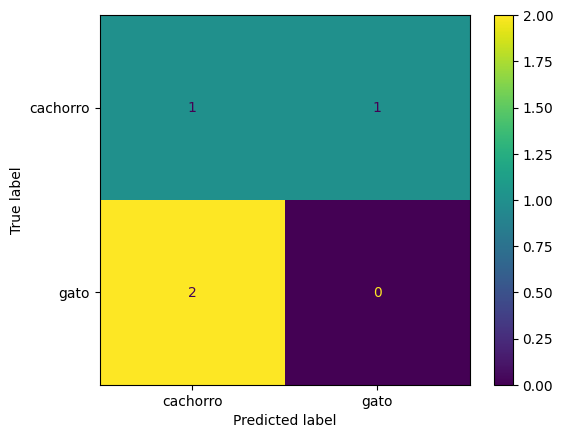

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_real_animais, y_pred_animais, labels=['cachorro','gato'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['cachorro','gato'])
disp.plot()
plt.show()